<a href="https://colab.research.google.com/github/snfruby/CS114.K21/blob/master/round3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import files
import pandas as pd
import numpy as np

In [17]:
data = pd.read_csv('http://cs.uit.edu.vn/data3.txt', names = ['size', 'time'])
data.head()

,size,time
0,37837612,4.12166
1,37395246,3.92089
2,36610827,3.21540
3,29555651,2.54506
4,25928216,2.21831


In [18]:
data['size^2'] = data['size'] * data['size']
data['size*log(size)'] = data['size'] * np.log10(data['size'])
columns_title = ['size', 'size^2', 'size*log(size)', 'time']
data = data.reindex(columns = columns_title)
data.head()

,size,size^2,size*log(size),time
0,37837612,1431684881862544,2.867305e+08,4.12166
1,37395246,1398404423400516,2.831873e+08,3.92089
2,36610827,1340352653623929,2.769100e+08,3.21540
3,29555651,873536506033801,2.207996e+08,2.54506
4,25928216,672272384942656,1.922259e+08,2.21831


In [0]:
from sklearn.model_selection import train_test_split
array = data.values
X = array[:,0:3]
y = array[:,3]
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=1)

In [20]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
models =[]
models.append(('DTR', DecisionTreeRegressor()))
models.append(('RFR', RandomForestRegressor()))
models.append(('LR', LinearRegression()))
models.append(('KNR', KNeighborsRegressor()))

r={}
for name, model in models:
  model.fit(X_train, y_train)
  val_pre = model.predict(X_valid)
  val_mae = mean_absolute_error(val_pre, y_valid)
  r[name]=val_mae
  print(name,":",val_mae)

DTR : 0.05845102533836954
RFR : 0.05141425900452668
LR : 0.04301142916048239
KNR : 0.04691199433427762


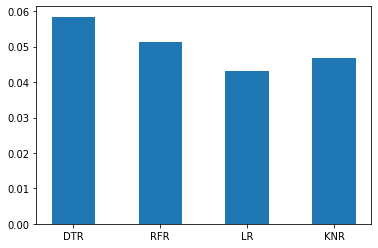

In [21]:
from matplotlib import pyplot
pyplot.bar(r.keys(), r.values(), width=0.5)
pyplot.show()

Kết quả tốt hơn hay tệ hơn? -> tệ hơn
Vấn đề gặp phải nếu tệ hơn là gì? Giải thích -> Do data bị nhiễu
Xây dựng model mới và ứng dụng dự báo mới sử dụng phương pháp tăng số features đã gợi ý trên lớp.
Model mới có performance như thế nào với model cũ? -> không tốt bằng model cũ
Phân tích sự khác biệt này!
-> em không biết ạ 